In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [75]:
dt_train = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
dt_test = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')

In [76]:
dt_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [77]:
dt_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [78]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [79]:
dt_train['Sentiment'].nunique()

5

In [80]:
dt_train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [81]:
dt_train['Sentiment'] = dt_train['Sentiment'].replace('Extremely Negative', 'Negative')
dt_train['Sentiment'] = dt_train['Sentiment'].replace('Extremely Positive', 'Positive')

dt_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [82]:
dt_test['Sentiment'] = dt_test['Sentiment'].replace('Extremely Negative', 'Negative')
dt_test['Sentiment'] = dt_test['Sentiment'].replace('Extremely Positive', 'Positive')

dt_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Negative


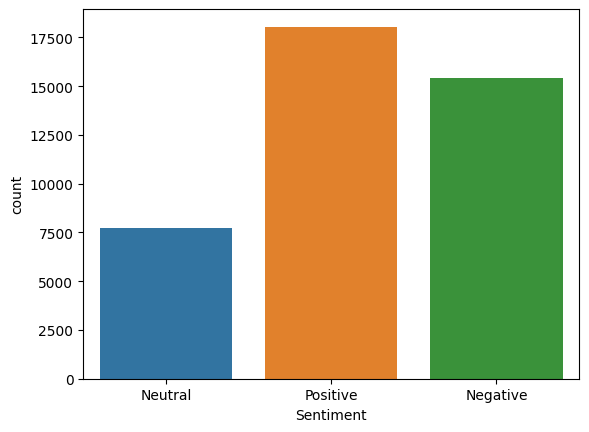

In [83]:
seg_bar = sns.countplot(x='Sentiment', data=dt_train)

In [84]:
sw = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()

    text = re.sub('\[.*?\]', '', text)

    text = re.sub("#\S+", " ", text)

    text = re.sub('@\S+', ' ', text)

    text = re.sub('https?://\S+|www\.\S+', ' ', text)

    text = re.sub('\n', ' ', text)

    text = re.sub('\s{2,}',' ', text)

    text = ' '.join([word for word in text.split(' ') if word not in sw])

    text = re.sub('[^a-zA-Z\s]', '', text)

    return text

In [85]:
dt_train['OriginalTweet'] = dt_train['OriginalTweet'].apply(clean_text)
dt_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,Positive
4,3803,48755,NaN,16-03-2020,me ready go supermarket outbreak im paranoid f...,Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering stock supermarket shel...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,Negative
41154,44953,89905,NaN,14-04-2020,know its getting tough rationing toilet paper ...,Positive
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanitizer starting turn on,Neutral


In [86]:
dt_test['OriginalTweet'] = dt_test['OriginalTweet'].apply(clean_text)
dt_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Negative
1,2,44954,"Seattle, WA",02-03-2020,find hand sanitizer fred meyer turned pack p...,Positive
2,3,44955,NaN,02-03-2020,find protect loved ones,Positive
3,4,44956,Chicagoland,02-03-2020,buying hits city anxious shoppers stock fooda...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,one week everyone buying baby milk powder nex...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,meanwhile supermarket israel people dance sin...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,panic buy lot nonperishable items echo needs f...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,asst prof economics talking recent research co...,Neutral
3796,3797,48749,NaN,16-03-2020,gov need somethings instead biar je rakyat ass...,Negative


In [87]:
negative_tweets = dt_train[dt_train['Sentiment'] == 'Negative'].OriginalTweet.tolist()
positive_tweets = dt_train[dt_train['Sentiment'] == 'Positive'].OriginalTweet.tolist()
neutral_tweets = dt_train[dt_train['Sentiment'] == 'Neutral'].OriginalTweet.tolist()

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

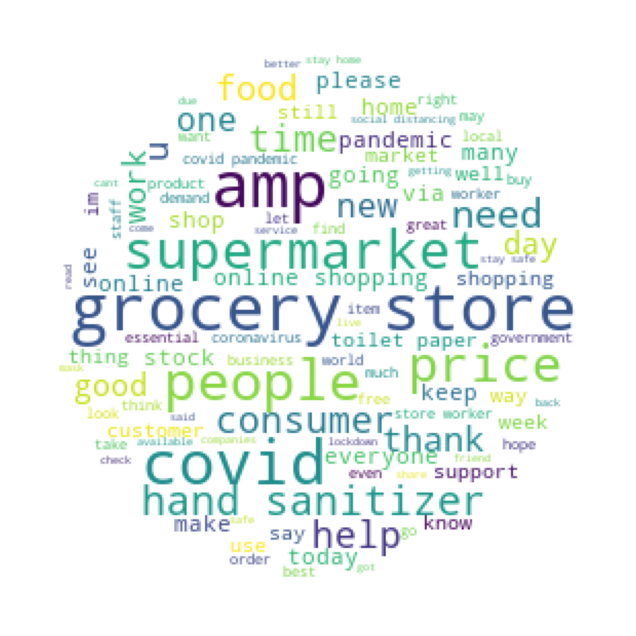

In [88]:
positive_cloud = WordCloud(width=1500, height=1500, background_color='white', max_words=100, mask=mask).generate(' '.join(positive_tweets))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(positive_cloud)
plt.axis('off')
plt.show()

In [89]:
positive_words_count = Counter(" ".join(positive_tweets).split()).most_common(10)
positive_words_count

[('covid', 4586),
 ('store', 3271),
 ('prices', 2945),
 ('grocery', 2920),
 ('supermarket', 2846),
 ('food', 2679),
 ('amp', 2544),
 ('people', 2255),
 ('consumer', 1954),
 ('hand', 1769)]

<BarContainer object of 10 artists>

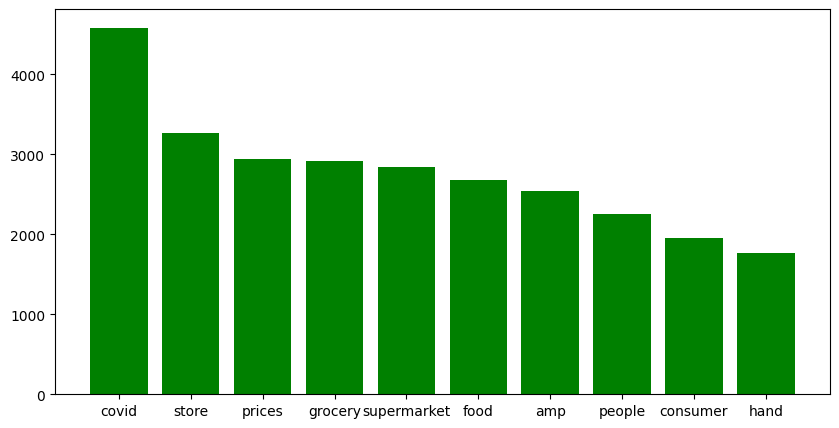

In [90]:
positive_words, positive_count = zip(*positive_words_count)

plt.figure(figsize=(10, 5))
plt.bar(positive_words, positive_count, color='green')

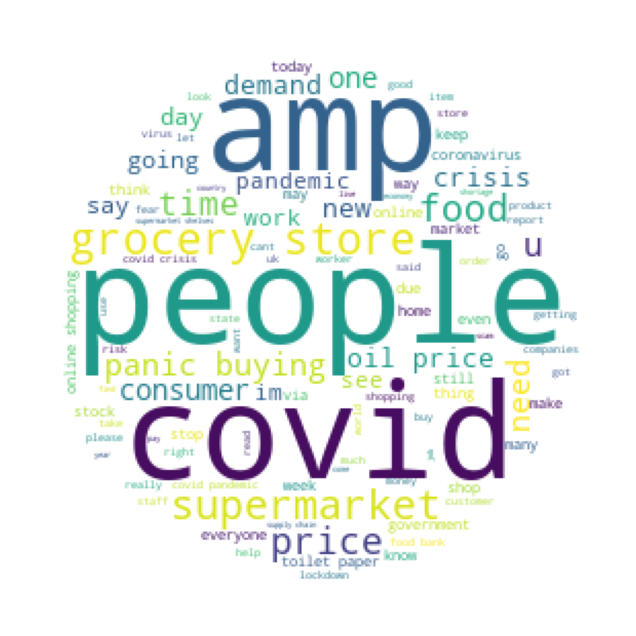

In [91]:
negative_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100, mask=mask).generate(' '.join(negative_tweets))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(negative_cloud)
plt.axis('off')
plt.show()

In [92]:
negative_words_count = Counter(" ".join(negative_tweets).split()).most_common(10)
negative_words_count

[('covid', 4149),
 ('prices', 3684),
 ('food', 3471),
 ('people', 2623),
 ('supermarket', 2546),
 ('store', 2180),
 ('grocery', 2013),
 ('panic', 1950),
 ('amp', 1903),
 ('consumer', 1404)]

<BarContainer object of 10 artists>

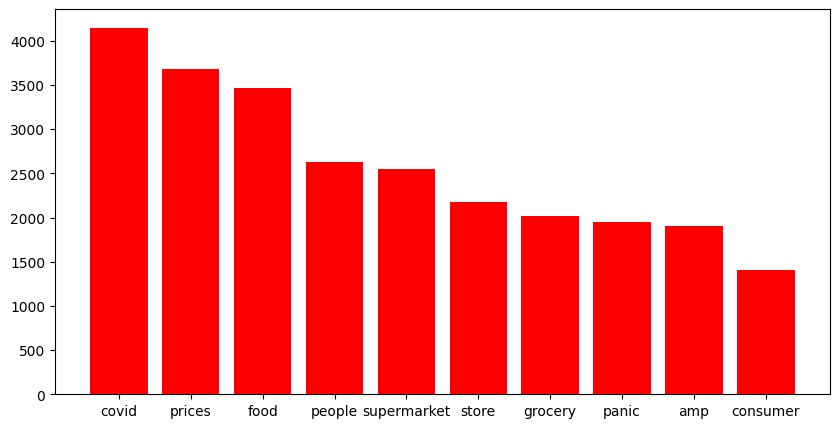

In [93]:
negative_words, negative_count = zip(*negative_words_count)

plt.figure(figsize=(10, 5))
plt.bar(negative_words, negative_count, color='red')

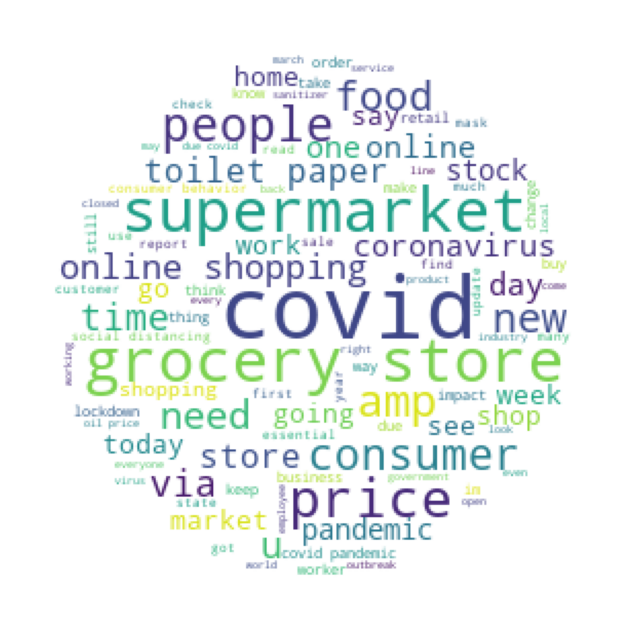

In [94]:
neutral_cloud = WordCloud(width=1500, height=1500, background_color='white', max_words=100, mask = mask).generate(' '.join(neutral_tweets))

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(neutral_cloud)
plt.axis('off')
plt.show()

In [95]:
neutral_words_count = Counter(" ".join(neutral_tweets).split()).most_common(10)
neutral_words_count

[('covid', 1742),
 ('store', 1304),
 ('supermarket', 1241),
 ('prices', 1191),
 ('grocery', 1122),
 ('consumer', 904),
 ('shopping', 678),
 ('online', 665),
 ('food', 609),
 ('people', 599)]

<BarContainer object of 10 artists>

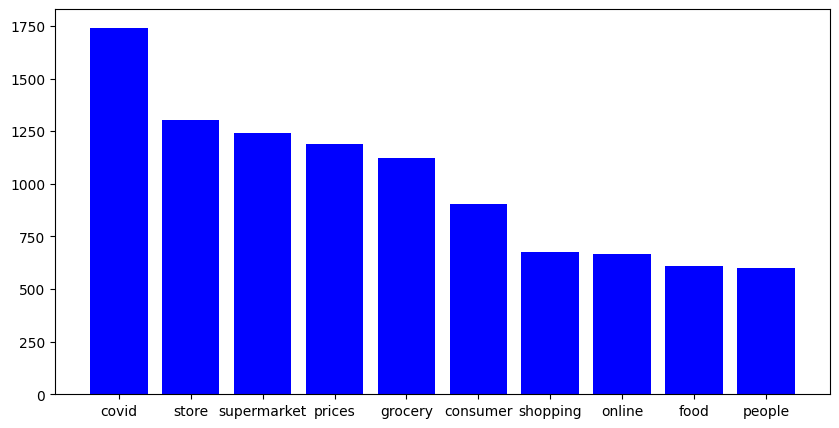

In [96]:
neutral_words, neutral_count = zip(*neutral_words_count)

plt.figure(figsize=(10, 5))
plt.bar(neutral_words, neutral_count, color='blue')

In [97]:
# Count Vectorizer
count_vectorizer = CountVectorizer()
dt_train_c_vectorized = count_vectorizer.fit_transform(dt_train['OriginalTweet'])
dt_test_c_vectorized = count_vectorizer.transform(dt_test['OriginalTweet'])

In [98]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(dt_train_c_vectorized, dt_train['Sentiment'])

lr_pred = lr_model.predict(dt_test_c_vectorized)
print("Accuracy: ", accuracy_score(dt_test['Sentiment'], lr_pred))

lr_report = classification_report(dt_test['Sentiment'], lr_pred)
print("Classification report: ", lr_report)

Accuracy:  0.8185887309110058
Classification report:                precision    recall  f1-score   support

    Negative       0.86      0.80      0.83      1633
     Neutral       0.71      0.75      0.73       619
    Positive       0.83      0.87      0.85      1546

    accuracy                           0.82      3798
   macro avg       0.80      0.81      0.80      3798
weighted avg       0.82      0.82      0.82      3798



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

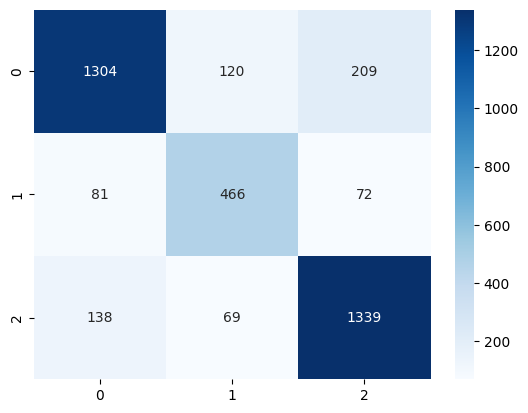

In [99]:
lr_cfm = confusion_matrix(dt_test['Sentiment'], lr_pred)
sns.heatmap(lr_cfm, cmap='Blues', annot=True, fmt='d')

In [100]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(dt_train_c_vectorized, dt_train['Sentiment'])

nb_pred = nb_model.predict(dt_test_c_vectorized)
print("Accuracy: ", accuracy_score(dt_test['Sentiment'], nb_pred))

nb_report = classification_report(dt_test['Sentiment'], nb_pred)
print("Classification report: ", nb_report)

Accuracy:  0.6793048973143759
Classification report:                precision    recall  f1-score   support

    Negative       0.71      0.76      0.73      1633
     Neutral       0.61      0.17      0.27       619
    Positive       0.66      0.80      0.72      1546

    accuracy                           0.68      3798
   macro avg       0.66      0.58      0.57      3798
weighted avg       0.67      0.68      0.65      3798



<Axes: >

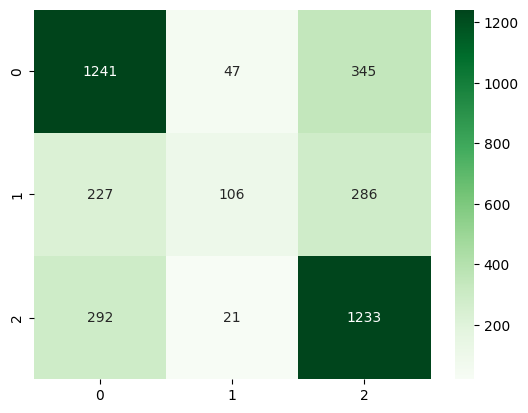

In [101]:
nb_cfm = confusion_matrix(dt_test['Sentiment'], nb_pred)
sns.heatmap(nb_cfm, cmap='Greens', annot=True, fmt='d')

In [110]:
models = [nb_model, lr_model]
model_names = ['MultinomialNB', 'Logistic Regression']

model_comparison = pd.DataFrame()

for model_name, model in zip(model_names, models):
    pred = model.predict(dt_test_c_vectorized)
    report = classification_report(dt_test['Sentiment'], pred, output_dict=True)
    
    model_comparison = model_comparison.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }, ignore_index=True)

model_comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_22980\704848664.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_22980\704848664.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


,Model,Accuracy,Precision,Recall,F1-score
0,MultinomialNB,0.656135,0.703554,0.656135,0.604878
1,Logistic Regression,0.768562,0.767460,0.768562,0.765653


In [103]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
dt_train_t_vectorized = tfidf_vectorizer.fit_transform(dt_train['OriginalTweet'])
dt_test_t_vectorized = tfidf_vectorizer.transform(dt_test['OriginalTweet'])

In [104]:
lr_model.fit(dt_train_t_vectorized, dt_train['Sentiment'])

lr_pred = lr_model.predict(dt_test_t_vectorized)
print("Accuracy: ", accuracy_score(dt_test['Sentiment'], lr_pred))

lr_report = classification_report(dt_test['Sentiment'], lr_pred)
print("Classification report: ", lr_report)

Accuracy:  0.7975250131648236
Classification report:                precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      1633
     Neutral       0.75      0.64      0.69       619
    Positive       0.80      0.86      0.83      1546

    accuracy                           0.80      3798
   macro avg       0.79      0.77      0.77      3798
weighted avg       0.80      0.80      0.80      3798



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

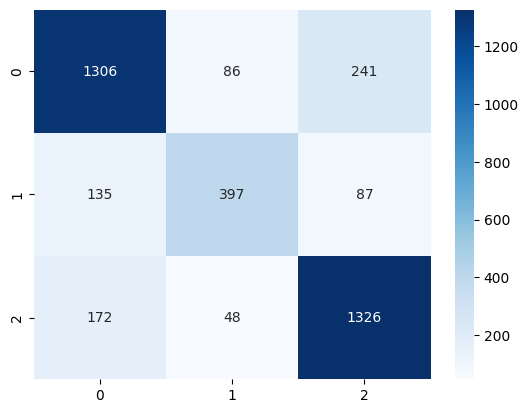

In [105]:
lr_cfm = confusion_matrix(dt_test['Sentiment'], lr_pred)
sns.heatmap(lr_cfm, cmap='Blues', annot=True, fmt='d')

In [106]:
nb_model.fit(dt_train_t_vectorized, dt_train['Sentiment'])

nb_pred = nb_model.predict(dt_test_t_vectorized)
print("Accuracy: ", accuracy_score(dt_test['Sentiment'], nb_pred))

nb_report = classification_report(dt_test['Sentiment'], nb_pred)
print("Classification report: ", nb_report)

Accuracy:  0.6448130595050027
Classification report:                precision    recall  f1-score   support

    Negative       0.77      0.65      0.70      1633
     Neutral       0.86      0.01      0.02       619
    Positive       0.57      0.90      0.70      1546

    accuracy                           0.64      3798
   macro avg       0.73      0.52      0.47      3798
weighted avg       0.70      0.64      0.59      3798



<Axes: >

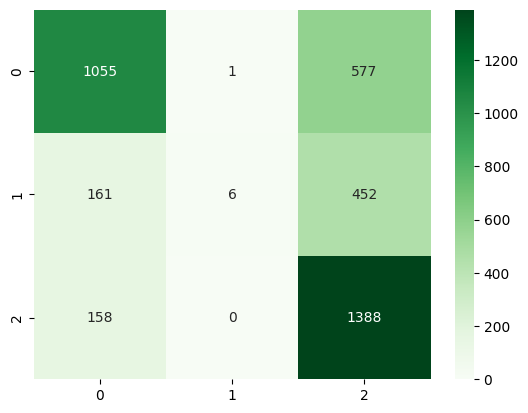

In [107]:
nb_cfm = confusion_matrix(dt_test['Sentiment'], nb_pred)
sns.heatmap(nb_cfm, cmap='Greens', annot=True, fmt='d')

In [113]:
models = [nb_model, lr_model]
model_names = ['MultinomialNB', 'Logistic Regression']

model_comparison = pd.DataFrame()
for model_name, model in zip(model_names, models):
    pred = model.predict(dt_test_t_vectorized)
    report = classification_report(dt_test['Sentiment'], pred, output_dict=True)
    
    model_comparison = model_comparison.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }, ignore_index=True)

model_comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_22980\3441019205.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_22980\3441019205.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({


,Model,Accuracy,Precision,Recall,F1-score
0,MultinomialNB,0.644813,0.703595,0.644813,0.589962
1,Logistic Regression,0.797525,0.796315,0.797525,0.795859
